In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd

from rpy2.robjects import r

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R -o counts -o cells -o batch

suppressMessages(library(splatter))

params <- newSplatParams()

params <- setParam(params, "nGenes", 2000)
params <- setParam(params, "batchCells", c(1000, 1000, 2000))
params <- setParam(params, "batch.facLoc", 0.3)
params <- setParam(params, "batch.facScale", 0.3)
params <- setParam(params, "group.prob", c(1/4, 1/4, 1/4, 1/4))

sim <- splatSimulate(params, method="groups", verbose=FALSE)

counts <- data.frame(counts(sim))
cells <- colData(sim)[,"Group"]
batch <- colData(sim)[,"Batch"]

In [5]:
counts = np.array(counts)
meta = pd.DataFrame({'cells': cells, 'batch': batch} , dtype="str", index = range(0, len(cells)))

In [6]:
adata = ad.AnnData(X = counts.T, obs = meta)
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

Transforming to str index.


... storing 'cells' as categorical
... storing 'batch' as categorical


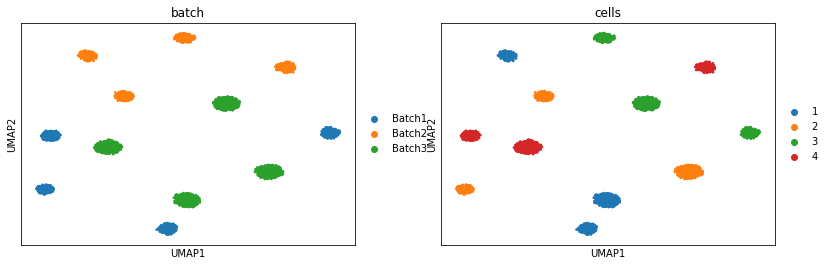

In [7]:
sc.pl.umap(adata,color=['batch','cells'])

In [8]:
from bbtnn import tnn

In [9]:
adata = adata[np.random.choice(adata.obs_names, adata.shape[0], replace = False)]

In [10]:
from bbtnn.tnn import *

In [11]:
%%time
model = tnn.TNN(k = 50, batch_size = 32, n_epochs_without_progress = 2, verbose = 2)
model.fit(X = adata, Y = None)
embedding = model.transform(X = adata)

[[0.    0.367 0.536]
 [0.    0.    0.334]
 [0.    0.    0.   ]]
1666
******Batches:[Batch2, Batch3, Batch1]
Categories (3, object): [Batch2, Batch3, Batch1]
******Total number of cells:4000
******Number of cells for MNN:2334


W0324 22:54:46.559883  3180 deprecation.py:323] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4075: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0324 22:54:46.699578  3180 deprecation.py:506] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training neural network
Epoch 1/1000
125/125 - 3s - loss: 1.5632
Epoch 2/1000
125/125 - 1s - loss: 1.2109
Epoch 3/1000
125/125 - 1s - loss: 0.9898
Epoch 4/1000
125/125 - 1s - loss: 0.8463
Epoch 5/1000
125/125 - 1s - loss: 0.7271
Epoch 6/1000
125/125 - 0s - loss: 0.6496
Epoch 7/1000
125/125 - 1s - loss: 0.5942
Epoch 8/1000
125/125 - 1s - loss: 0.5198
Epoch 9/1000
125/125 - 1s - loss: 0.4793
Epoch 10/1000
125/125 - 1s - loss: 0.4035
Epoch 11/1000
125/125 - 1s - loss: 0.3775
Epoch 12/1000
125/125 - 1s - loss: 0.3692
Epoch 13/1000
125/125 - 1s - loss: 0.3353
Epoch 14/1000
125/125 - 1s - loss: 0.3288
Epoch 15/1000
125/125 - 1s - loss: 0.3219
Epoch 16/1000
125/125 - 1s - loss: 0.3213
Epoch 17/1000
125/125 - 1s - loss: 0.3183
Epoch 18/1000
125/125 - 1s - loss: 0.3042
Epoch 19/1000
125/125 - 1s - loss: 0.3119
Epoch 20/1000
125/125 - 1s - loss: 0.2918
Epoch 21/1000
125/125 - 1s - loss: 0.3067
Epoch 22/1000
125/125 - 1s - loss: 0.2973
4000/4000 - 0s
Wall time: 30.2 s


In [12]:
from bbtnn.tnn import *

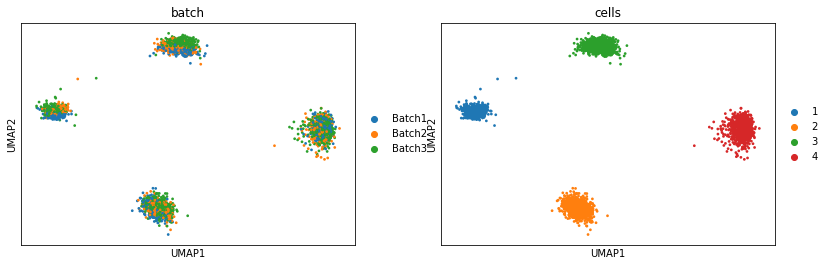

In [12]:
adata.obsm["X_umap"] = embedding
sc.pl.umap(adata, color = ["batch", "cells"])

In [14]:
bdata = adata[~((adata.obs["batch"] == "Batch1") & (adata.obs["cells"] =="4"))]
bdata = bdata[~((bdata.obs["batch"] == "Batch2") & (bdata.obs["cells"] =="4"))]

In [15]:
bdata

View of AnnData object with n_obs × n_vars = 3481 × 2000 
    obs: 'cells', 'batch', 'n_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'batch_colors', 'cells_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [16]:
sc.tl.pca(bdata)
sc.pp.neighbors(bdata, n_neighbors=10)
sc.tl.umap(bdata)

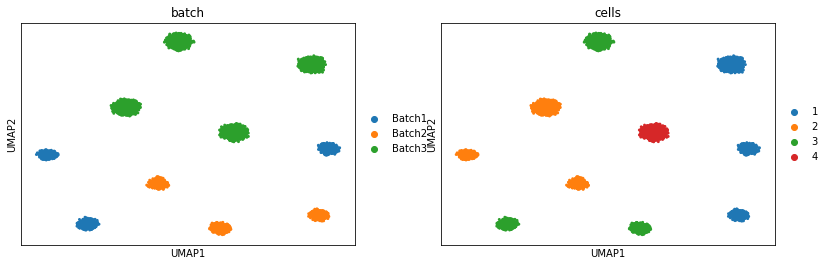

In [17]:
sc.pl.umap(bdata, color = ["batch", "cells"])

In [24]:
%%time
model = tnn.TNN(k = 10, batch_size = 32, n_epochs_without_progress = 2, verbose = 2)
model.fit(X = bdata, Y = None)
embedding = model.transform(X = bdata)

[[0.         0.06910569 0.1598916 ]
 [0.         0.         0.0551817 ]
 [0.         0.         0.        ]]
2984
******Batches:[Batch2, Batch3, Batch1]
Categories (3, object): [Batch2, Batch3, Batch1]
******Total number of cells:3481
******Number of cells for MNN:497
Training neural network
Epoch 1/1000
109/109 - 3s - loss: 1.1181
Epoch 2/1000
109/109 - 1s - loss: 0.8498
Epoch 3/1000
109/109 - 1s - loss: 0.7683
Epoch 4/1000
109/109 - 1s - loss: 0.7136
Epoch 5/1000
109/109 - 1s - loss: 0.6968
Epoch 6/1000
109/109 - 1s - loss: 0.6212
Epoch 7/1000
109/109 - 1s - loss: 0.5682
Epoch 8/1000
109/109 - 1s - loss: 0.5067
Epoch 9/1000
109/109 - 1s - loss: 0.4694
Epoch 10/1000
109/109 - 1s - loss: 0.4331
Epoch 11/1000
109/109 - 1s - loss: 0.4065
Epoch 12/1000
109/109 - 1s - loss: 0.3792
Epoch 13/1000
109/109 - 1s - loss: 0.3640
Epoch 14/1000
109/109 - 1s - loss: 0.3514
Epoch 15/1000
109/109 - 1s - loss: 0.3241
Epoch 16/1000
109/109 - 1s - loss: 0.3139
Epoch 17/1000
109/109 - 1s - loss: 0.3128
Ep

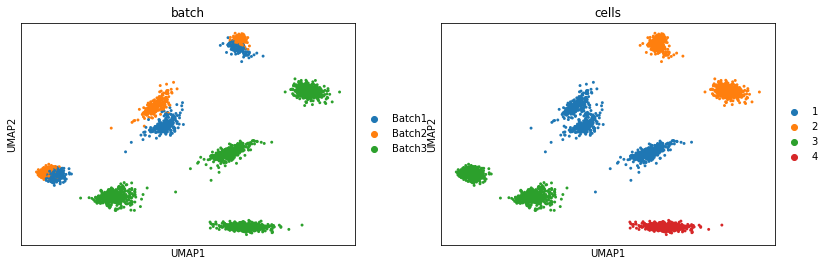

In [25]:
bdata.obsm["X_umap"] = embedding
sc.pl.umap(bdata, color = ["batch", "cells"])

In [25]:
from bbtnn import tnn_v2

In [45]:
%%time
model = tnn_v2.TNN(k = 25, batch_size = 32, n_epochs_without_progress = 2, verbose = 2)
model.fit(X = adata, batch_name = "batch", Y = None)
embedding = model.transform(X = adata)

Calculate MNN pairs
(0, 1)
(0, 2)
(1, 2)
Reformat MNN pairs
Calculate KNN neighborhood
******Batches:[Batch3, Batch1, Batch2]
Categories (3, object): [Batch3, Batch1, Batch2]
******Total number of cells:10000
******Number of cells for MNN:2692
******Number of cells for KNN:7308
Sort cells
Training neural network
Epoch 1/1000
313/313 - 3s - loss: 1.3886
Epoch 2/1000
313/313 - 1s - loss: 1.1445
Epoch 3/1000
313/313 - 1s - loss: 1.1232
Epoch 4/1000
313/313 - 1s - loss: 1.1018
Epoch 5/1000
313/313 - 1s - loss: 1.0858
Epoch 6/1000
313/313 - 1s - loss: 1.0791
Epoch 7/1000
313/313 - 1s - loss: 1.0713
Epoch 8/1000
313/313 - 1s - loss: 1.0638
Epoch 9/1000
313/313 - 1s - loss: 1.0574
Epoch 10/1000
313/313 - 1s - loss: 1.0495
Epoch 11/1000
313/313 - 1s - loss: 1.0453
Epoch 12/1000
313/313 - 1s - loss: 1.0418
Epoch 13/1000
313/313 - 1s - loss: 1.0399
Epoch 14/1000
313/313 - 1s - loss: 1.0370
Epoch 15/1000
313/313 - 1s - loss: 1.0320
Epoch 16/1000
313/313 - 1s - loss: 1.0285
Epoch 17/1000
313/313 -

In [16]:
adata.obsm["X_umap"] = embedding
sc.pl.umap(adata, color = ["batch", "cells"])

ValueError: Value passed for key 'X_umap' is of incorrect shape. Values of obsm must match dimensions (0,) of parent. Value had shape (8512, 2) while it should have had (10000,).

In [53]:
%%time
model = tnn_v2.TNN(k = 100, batch_size = 32, n_epochs_without_progress = 2, verbose = 2)
model.fit(X = bdata, batch_name = "batch", Y = None)
embedding = model.transform(X = bdata)

Calculate MNN pairs
(0, 1)
(0, 2)
(1, 2)
Reformat MNN pairs
Calculate KNN neighborhood
******Batches:[Batch3, Batch1, Batch2]
Categories (3, object): [Batch3, Batch1, Batch2]
******Total number of cells:8512
******Number of cells for MNN:4796
******Number of cells for KNN:3716
Sort cells
Training neural network
Epoch 1/1000
266/266 - 3s - loss: 1.3860
Epoch 2/1000
266/266 - 1s - loss: 1.1405
Epoch 3/1000
266/266 - 1s - loss: 1.1185
Epoch 4/1000
266/266 - 1s - loss: 1.1030
Epoch 5/1000
266/266 - 1s - loss: 1.0924
Epoch 6/1000
266/266 - 1s - loss: 1.0802
Epoch 7/1000
266/266 - 1s - loss: 1.0695
Epoch 8/1000
266/266 - 1s - loss: 1.0316
Epoch 9/1000
266/266 - 1s - loss: 0.9586
Epoch 10/1000
266/266 - 1s - loss: 0.9104
Epoch 11/1000
266/266 - 1s - loss: 0.8667
Epoch 12/1000
266/266 - 1s - loss: 0.8454
Epoch 13/1000
266/266 - 1s - loss: 0.8259
Epoch 14/1000
266/266 - 1s - loss: 0.8297
Epoch 15/1000
266/266 - 1s - loss: 0.8165
Epoch 16/1000
266/266 - 1s - loss: 0.7946
Epoch 17/1000
266/266 - 

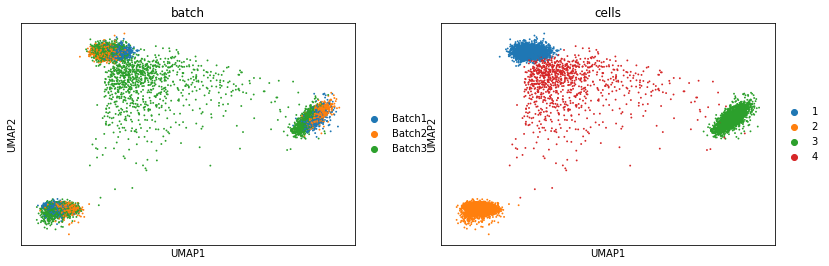

In [54]:
bdata.obsm["X_umap"] = embedding
sc.pl.umap(bdata, color = ["batch", "cells"])